In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'images-coud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F829469%2F1417158%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T112353Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e8e16b5edc29ab8cde11420c9d162c77a123ad8e78b98b36cd1cbba0ec3506c1e380406c98af48f8209fb1f2ba8073d7b043c43a351c64fba4e24ed8fe962e22cea73802b836067e32db7cc5703c65e5bd507d6200b47ff67ac42f0acd22b4c6092f6cf499775631b0d64f73e3da999a0a90cfa1c98b36361aaeb2fd88fe9d35bb4d0a90e47833fe2c64b263b56e6e4981bb6ea17d395529f87797274b4436cfe5e098c76b8bda2563b5ebf2fabec1bbe94f26d1de4d28b16b2628bc05d00d6003228eee1d19d2e8a92a8a969c15193762e2c20478bb275966cddc8f1df6e264a560c5839238b7d46d0926070815ba5c7ef6bf8c8771e6a63171ce5ba1e47af,fake-and-real-news-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4831777%2F8165591%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T112353Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D508b97f3f7748d34dfe97d5c6e7eaacfa35e02c6aaef41797587a22a2dfcc0d9c05594de128b997b9fd475f471eff7021236357aa6b4ccbb357b8c98dae386f84902d13291fcb3bb246a46c5fb90574dcfdd96837a6cb9b95ca98ce3e3cf7923b890d5197b27fa09697c121732f5575ad574b8b9b98a54602aa6053ce4a3e18ca197e6e1d88f8f5c4418a7532af127d8aa2ead1c03bb70c786608b74862fe9515ceaabb3e4514094ca2d6f10ba5f58a8c952d1c044141d29427d6c7862ae3b7330d5dbeaed345cb3e52094b3fb7c4507741f849ea9895ce3298f68ab52f32ea3f04f5f66994259e10e6e67395ffafcdeea0a9dc4238f47cbdf039724e2d14e0f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 121172 bytes downloaded
Downloaded and uncompressed: images-coud
[==================================================] 42975911 bytes downloaded
Downloaded and uncompressed: fake-and-real-news-dataset
Data source import complete.


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'images-coud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F829469%2F1417158%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T112353Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e8e16b5edc29ab8cde11420c9d162c77a123ad8e78b98b36cd1cbba0ec3506c1e380406c98af48f8209fb1f2ba8073d7b043c43a351c64fba4e24ed8fe962e22cea73802b836067e32db7cc5703c65e5bd507d6200b47ff67ac42f0acd22b4c6092f6cf499775631b0d64f73e3da999a0a90cfa1c98b36361aaeb2fd88fe9d35bb4d0a90e47833fe2c64b263b56e6e4981bb6ea17d395529f87797274b4436cfe5e098c76b8bda2563b5ebf2fabec1bbe94f26d1de4d28b16b2628bc05d00d6003228eee1d19d2e8a92a8a969c15193762e2c20478bb275966cddc8f1df6e264a560c5839238b7d46d0926070815ba5c7ef6bf8c8771e6a63171ce5ba1e47af,fake-and-real-news-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4831777%2F8165591%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T112353Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D508b97f3f7748d34dfe97d5c6e7eaacfa35e02c6aaef41797587a22a2dfcc0d9c05594de128b997b9fd475f471eff7021236357aa6b4ccbb357b8c98dae386f84902d13291fcb3bb246a46c5fb90574dcfdd96837a6cb9b95ca98ce3e3cf7923b890d5197b27fa09697c121732f5575ad574b8b9b98a54602aa6053ce4a3e18ca197e6e1d88f8f5c4418a7532af127d8aa2ead1c03bb70c786608b74862fe9515ceaabb3e4514094ca2d6f10ba5f58a8c952d1c044141d29427d6c7862ae3b7330d5dbeaed345cb3e52094b3fb7c4507741f849ea9895ce3298f68ab52f32ea3f04f5f66994259e10e6e67395ffafcdeea0a9dc4238f47cbdf039724e2d14e0f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 121172 bytes downloaded
Downloaded and uncompressed: images-coud
[==================================================] 42975911 bytes downloaded
Downloaded and uncompressed: fake-and-real-news-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/images-coud/thumbs-up.png
/kaggle/input/images-coud/skull-icon.png
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [ ]:
fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [ ]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [ ]:
fake['subject'].value_counts()

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64

In [ ]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [ ]:
real['subject'].value_counts()

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

In [ ]:
#creating category
fake['category']=1
real['category']=0

In [ ]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  category  
0  December 31, 2017         1  
1  December 31, 2017         1  
2  December 30, 2017         1  
3  December 29, 2017         1  
4  December 25, 2017         1

In [ ]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  category  
0  December 31, 2017          0  
1  December 29, 2017          0  
2  December 31, 2017          0  
3  December 30, 2017          0  
4  December 29, 2017          0

In [ ]:
# join two datasets
df = pd.concat([fake,real]).reset_index(drop=True)
df.tail()

title  \
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...  worldnews   
44894  LONDON (Reuters) - LexisNexis, a provider of l...  worldnews   
44895  MINSK (Reuters) - In the shadow of disused Sov...  worldnews   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...  worldnews   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...  worldnews   

                   date  category  
44893  August 22, 2017          0  
44894  August 22, 2017          0  
44895  August 22, 2017          0  
44896  August 22, 2017          0  
44897  August 22, 2017          0

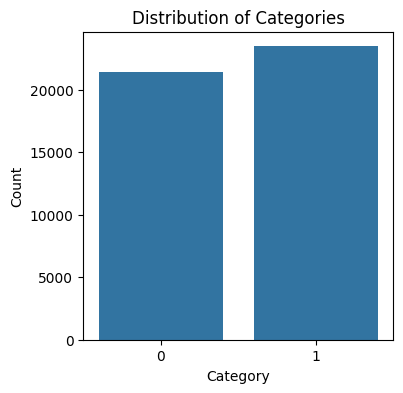

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(4, 4))
sns.countplot(x='category', data=df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [ ]:
print(df.columns)

Index(['title', 'text', 'subject', 'date', 'category'], dtype='object')


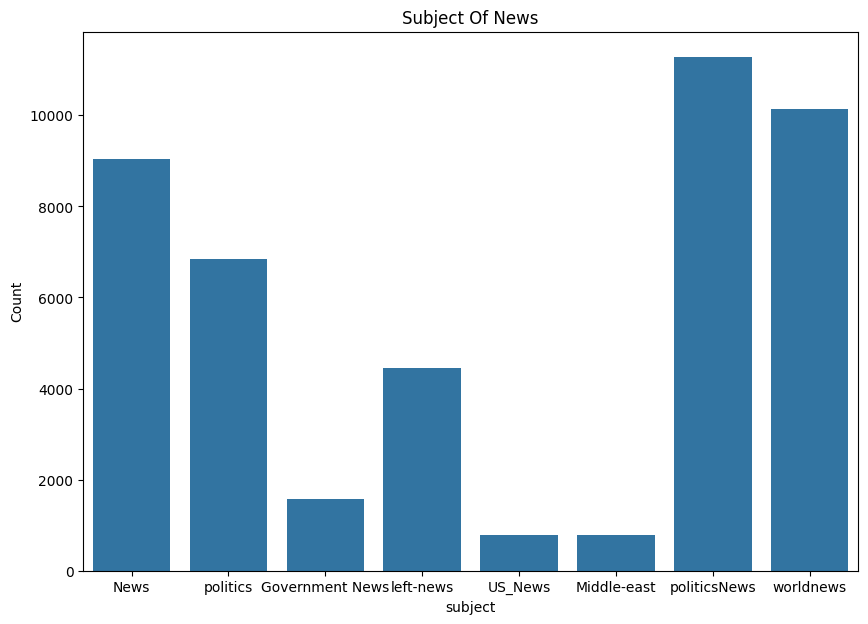

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='subject', data=df)
plt.title('Subject Of News')
plt.xlabel('subject')
plt.ylabel('Count')
plt.show()


In [ ]:
df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [ ]:
blanks = []  # Corrected the name from 'empty' to 'blanks' for consistency
for index, row in df.iterrows():
    if row['text'].isspace():  # Access the 'text' column correctly
        blanks.append(index)

print(len(blanks))  # Prints the count of rows with only whitespace
print(blanks)  # Optional: to see the list of indices


631
[10923, 11041, 11190, 11225, 11236, 11241, 11247, 11249, 11267, 11268, 11283, 11284, 11285, 11289, 11290, 11292, 11295, 11296, 11301, 11303, 11304, 11305, 11309, 11314, 11317, 11319, 11322, 11330, 11334, 11335, 11340, 11343, 11348, 11351, 11352, 11357, 11371, 11373, 11374, 11382, 11397, 11402, 11403, 11409, 11410, 11412, 11415, 11419, 11421, 11427, 11431, 11432, 11440, 11448, 11450, 11453, 11462, 11464, 11465, 11472, 11473, 11475, 11478, 11489, 11491, 11493, 11494, 11501, 11505, 11507, 11520, 11531, 11532, 11533, 11538, 11542, 11547, 11549, 11551, 11559, 11563, 11581, 11585, 11589, 11590, 11614, 11624, 11625, 11627, 11631, 11636, 11637, 11643, 11650, 11658, 11661, 11672, 11679, 11681, 11684, 11686, 11688, 11692, 11708, 11718, 11729, 11739, 11753, 11765, 11768, 11777, 11782, 11786, 11788, 11792, 11793, 11803, 11806, 11813, 11821, 11831, 11832, 11841, 11844, 11848, 11854, 11858, 11860, 11863, 11866, 11872, 11874, 11875, 11879, 11881, 11884, 11889, 11893, 11900, 11904, 11906, 11913, 1

In [ ]:
df['text'][21815]

' '

In [ ]:
df.shape

(44898, 5)

In [ ]:
# Before dropping, ensure all indices in 'blanks' are valid
valid_blanks = [index for index in blanks if index in df.index]
df.drop(valid_blanks, inplace=True)
print(df)


                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
44893  'Fully committed' NATO backs new U.S. approach...   
44894  LexisNexis withdrew two products from Chinese ...   
44895  Minsk cultural hub becomes haven from authorities   
44896  Vatican upbeat on possibility of Pope Francis ...   
44897  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text    subject  \
0      Donald Trump just couldn t wish all Americans ...       News   
1      House Intelligence Committee Chairman Devin Nu...       News   
2      On Friday, it was revealed that former Milwauk...       New

In [ ]:
df.shape

(44267, 5)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re
lemma=WordNetLemmatizer()
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize stopwords
list1 = set(stopwords.words('english'))
nlp = None  # Initialize nlp as None in case you don't use spaCy's stopwords
try:
    import spacy
    nlp = spacy.load('en_core_web_sm')
    list2 = nlp.Defaults.stop_words
except ImportError:
    list2 = set()

# Combined set of stopwords
Stopwords = list1 | set(list2)

# Initialize lemmatizer
lemma = WordNetLemmatizer()

# Define the text cleaning function
def clean_text(text):
    # Tokenize text using word_tokenize from NLTK
    tokens = word_tokenize(text.lower())  # Convert to lowercase to ensure case-insensitive matching

    # Filter out tokens that are stopwords or non-alphabetic
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in Stopwords]

    # Lemmatize filtered tokens
    lemmatized_tokens = [lemma.lemmatize(word) for word in filtered_tokens]

    # Return the cleaned tokens as a string
    return " ".join(lemmatized_tokens)

# Assuming df is your DataFrame
# Apply the cleaning function to the entire 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Display the original and cleaned text
print(df[['text', 'cleaned_text']])


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


                                                    text  \
0      Donald Trump just couldn t wish all Americans ...   
1      House Intelligence Committee Chairman Devin Nu...   
2      On Friday, it was revealed that former Milwauk...   
3      On Christmas day, Donald Trump announced that ...   
4      Pope Francis used his annual Christmas Day mes...   
...                                                  ...   
44893  BRUSSELS (Reuters) - NATO allies on Tuesday we...   
44894  LONDON (Reuters) - LexisNexis, a provider of l...   
44895  MINSK (Reuters) - In the shadow of disused Sov...   
44896  MOSCOW (Reuters) - Vatican Secretary of State ...   
44897  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...   

                                            cleaned_text  
0      donald trump wish american happy new year leav...  
1      house intelligence committee chairman devin nu...  
2      friday revealed milwaukee sheriff david clarke...  
3      christmas day donald trump announced

In [ ]:
df['text'][10]

"A centerpiece of Donald Trump s campaign, and now his presidency, has been his white supremacist ways. That is why so many of the public feuds he gets into involve people of color. One of his favorite targets, is, of course, the players in the National Football League who dare to exercise their First Amendment rights by kneeling during the national anthem in protest of racist police brutality. Well, there is one person who has figured out that racism is bad for business, even if it did get the orange overlord elected: The founder of the pizza chain Papa John s.This is a man who has never been on the right side of history on any number of issues, and plus his pizza sucks. But, when he decided to complain about the players protesting, his sales really dropped. Turns out racism doesn t pay, and we all know that corporations are all about the bottom line. Therefore, Papa John Schnatter will no longer be CEO of the hack pizza chain.BREAKING: Papa John's founder John Schnatter to step down 

In [ ]:
clean_text(df['text'][10])

'centerpiece donald trump campaign presidency white supremacist way public feud get involve people color favorite target course player national football league dare exercise amendment right kneeling national anthem protest racist police brutality person figured racism bad business orange overlord elected founder pizza chain papa john man right history number issue plus pizza suck decided complain player protesting sale dropped turn racism pay know corporation line papa john schnatter longer ceo hack pizza papa john founder john schnatter step ceo announcement come week criticized nfl protest ap business news apbusiness december thing people certainly allowed political opinion realize opinion come dire consequence especially business trying garner sale support people presume goal ceo know pressure shareholder public outcry boycott nfl stepping right know gone future ceo run company inclusive diverse fabric america guiding symbol nation statue liberty bigot like trump schnatter past rest

In [ ]:
!pip install wordCloud


In [ ]:
from wordcloud import WordCloud

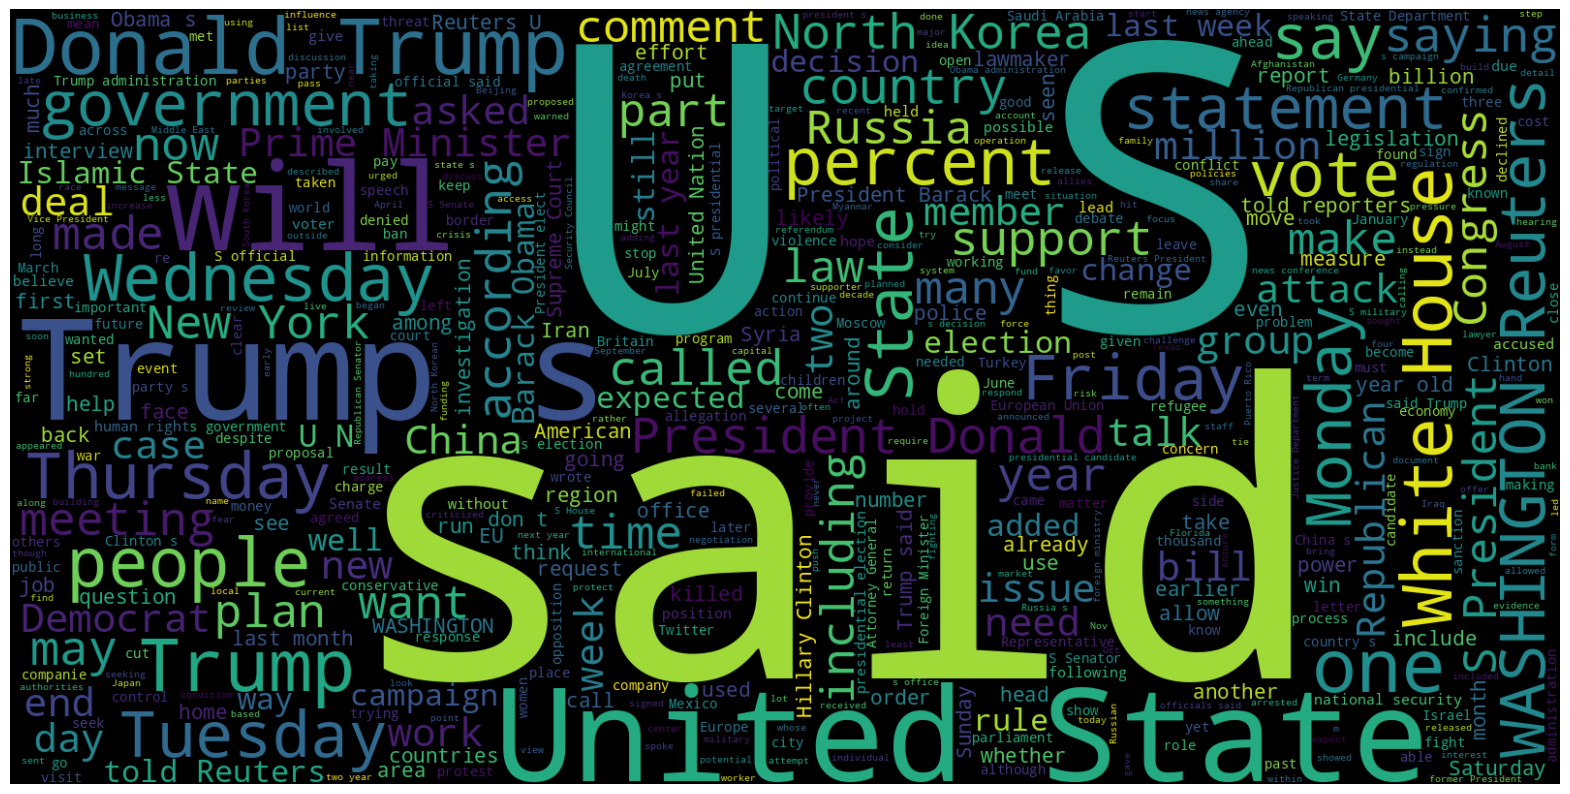

In [ ]:
#Real _news
plt.figure(figsize=(20,20))
wc = WordCloud(max_words =500, width =1600, height= 800).generate(''.join(df[df.category ==0].text))
plt.axis('off')
plt.imshow(wc,interpolation= 'bilinear')


In [ ]:
from PIL import Image

In [ ]:

from PIL import Image
thumb = '/kaggle/input/images-coud/thumbs-up.png'
icon = Image.open(thumb)
mask = Image.new(mode='RGB', size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

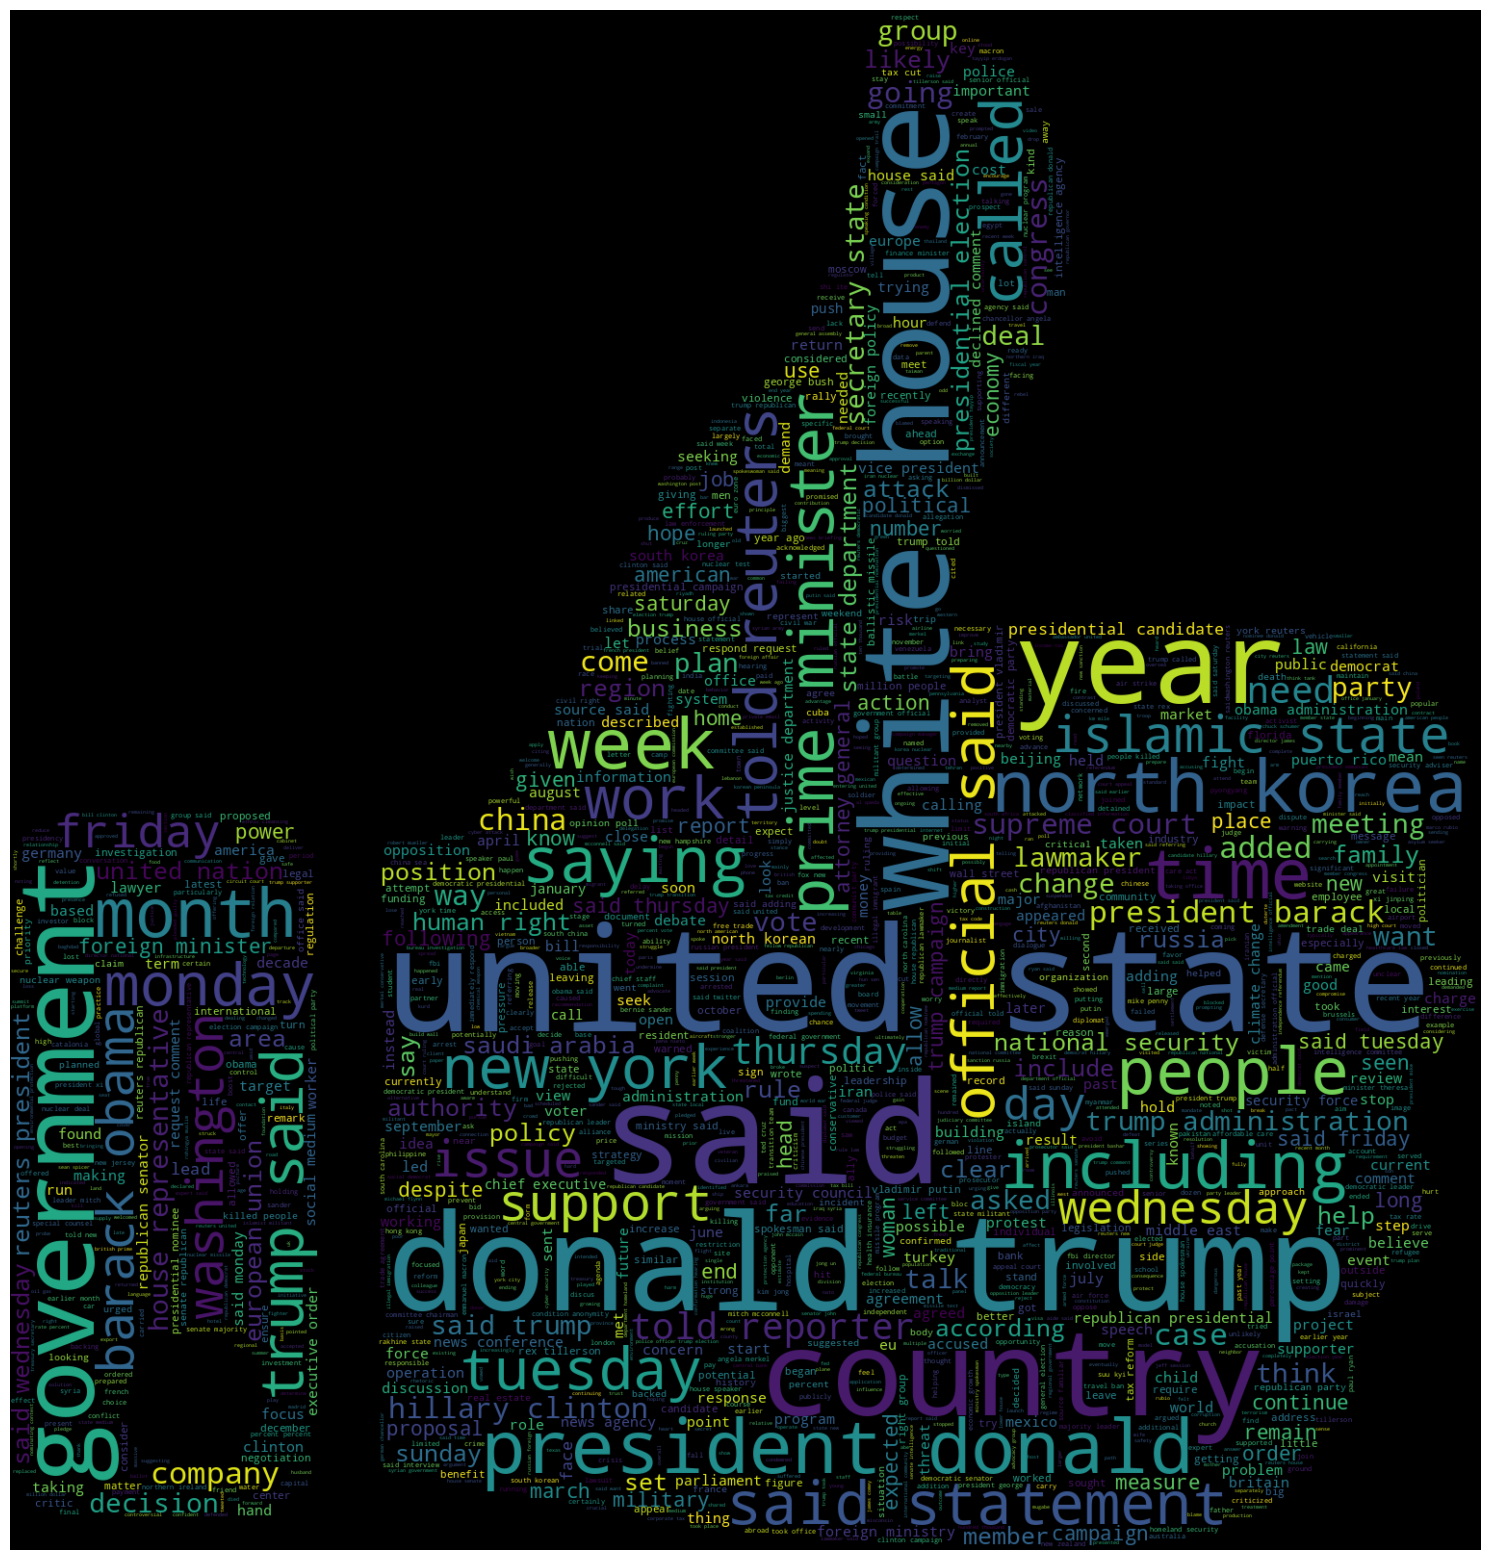

In [ ]:
#Real _news
plt.figure(figsize=(20,20))
wc = WordCloud(mask=rgb_array, max_words =2000, width =1600, height= 800).generate(''.join(df[df.category ==0].cleaned_text))
plt.axis('off')
plt.imshow(wc,interpolation= 'bilinear')


In [ ]:
import numpy as np
from PIL import Image
thumb = '/kaggle/input/images-coud/skull-icon.png'
icon = Image.open(thumb)
mask = Image.new(mode='RGB', size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)

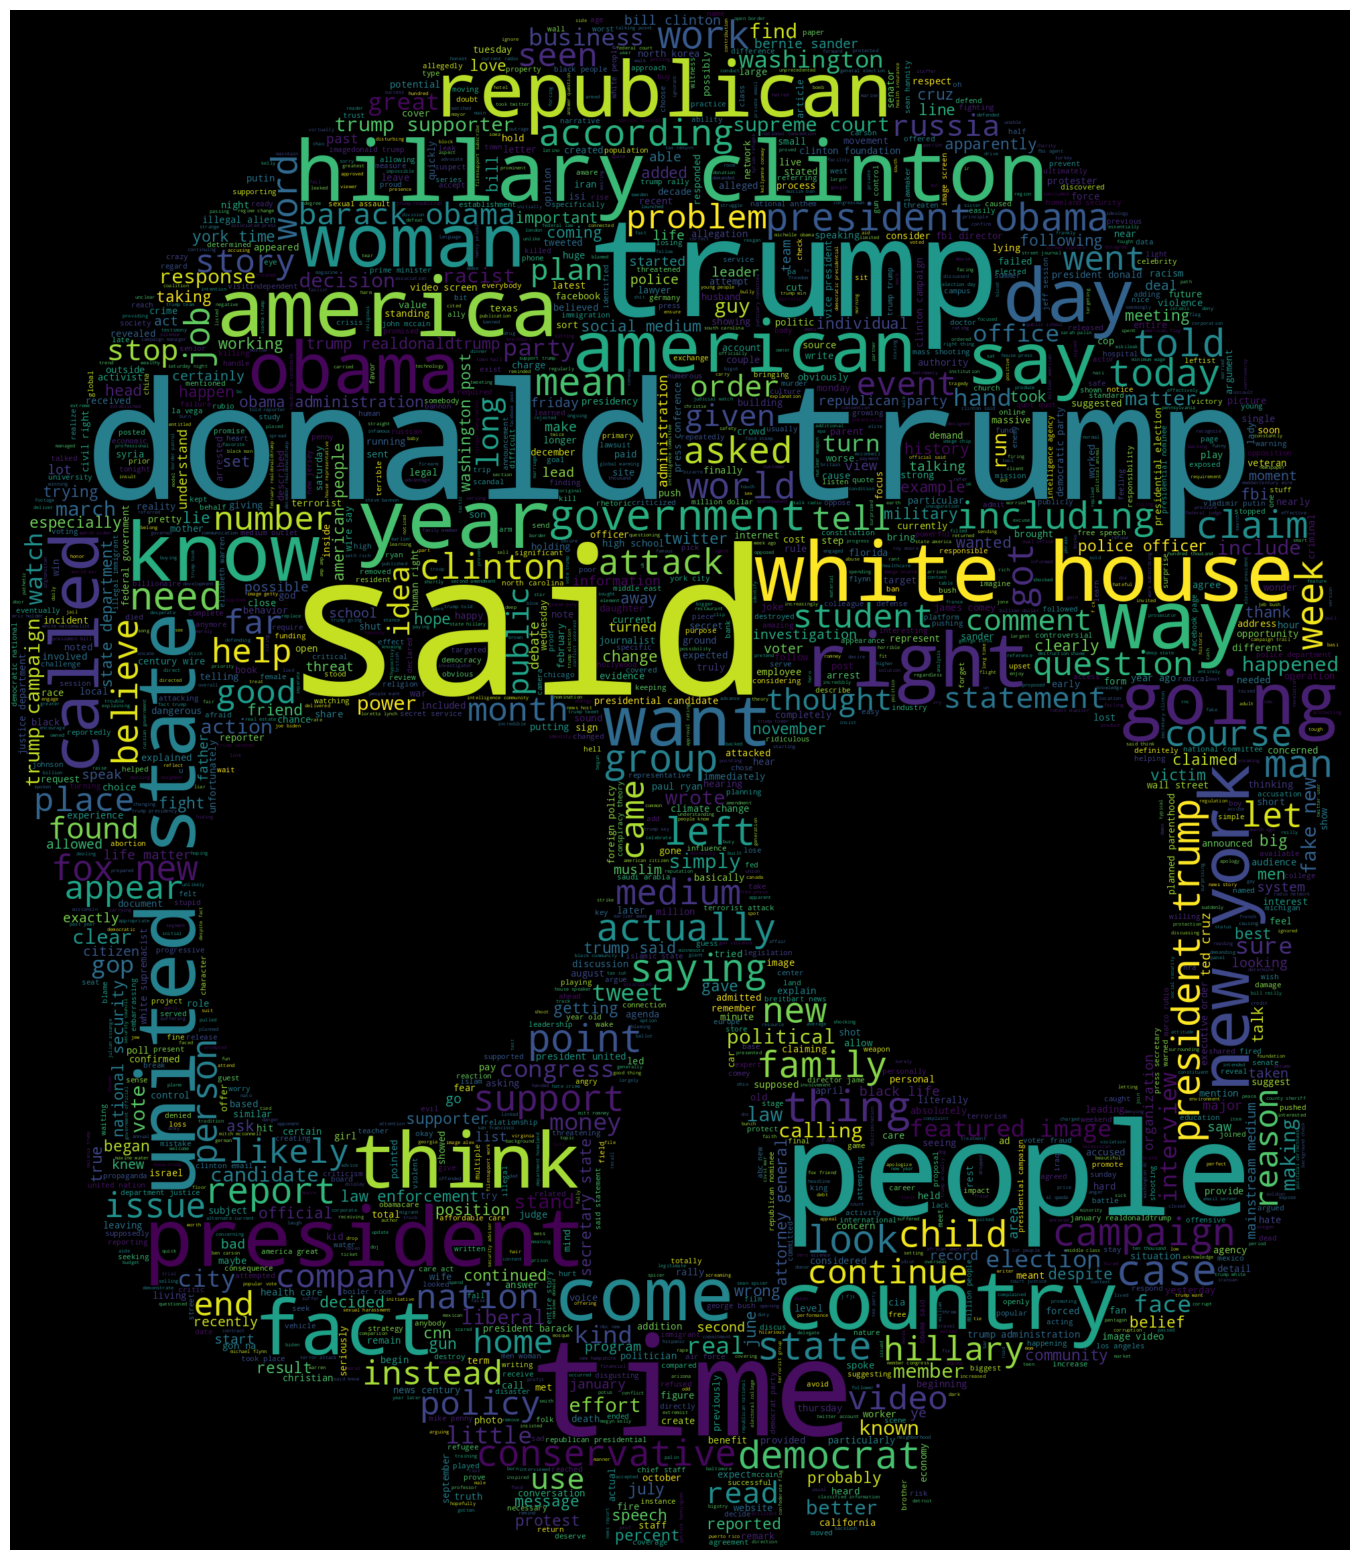

In [ ]:
#Fake _news
plt.figure(figsize=(20,20))
wc = WordCloud(mask=rgb_array, max_words =2000, width =1600, height= 800).generate(''.join(df[df.category ==1].cleaned_text))
plt.axis('off')
plt.imshow(wc,interpolation= 'bilinear')


In [ ]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  category  \
0  December 31, 2017         1   
1  December 31, 2017         1   
2  December 30, 2017         1   
3  December 29, 2017         1   
4  December 25, 2017         1   

                                        cleaned_text  
0  donald trump wish american happy new year leav...  
1  house intelligence committee chairman devin nu...  
2  friday revealed milwaukee sheriff david clarke...  
3  christmas day donald trump announced work foll...  
4  pope francis annual christmas day message rebu...

In [ ]:
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt



# # Convert texts to sequences using Tokenizer
# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(df['cleaned_text'])
# sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# # Pad sequences to ensure uniform input length
# max_len = max(len(seq) for seq in sequences)
# x_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# # Define the target variable
# y = df['category'].values  # This should be your binary labels

# # Train-test split
# x_train, x_test, y_train, y_test = train_test_split(x_padded, y, test_size=0.25, random_state=42)

# # Build the LSTM model
# model = Sequential()
# model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(64))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

# # Train the model
# history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# # Evaluate the model
# loss, accuracy = model.evaluate(x_test, y_test)
# print(f'Test Accuracy: {accuracy}')

# # Predict
# y_pred_prob = model.predict(x_test)
# y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# # Classification report
# print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(6,6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

x = df['cleaned_text']
y = df['category']     #Target
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
x_train_tfidf=vectorizer.fit_transform(x_train)
x_train_tfidf

<33200x82605 sparse matrix of type '<class 'numpy.float64'>'
	with 4596773 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.svm import LinearSVC

# Initialize the LinearSVC classifier
clf = LinearSVC()

# Fit the classifier on the training data
clf.fit(x_train_tfidf, y_train)



LinearSVC()

In [ ]:
from sklearn.pipeline import Pipeline
text_clf=Pipeline([('tfidf', TfidfVectorizer()),('clf',LinearSVC())])
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [ ]:
predictions = text_clf.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5309
           1       0.99      0.99      0.99      5758

    accuracy                           0.99     11067
   macro avg       0.99      0.99      0.99     11067
weighted avg       0.99      0.99      0.99     11067



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.9930423782416192


In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[5275   34]
 [  43 5715]]


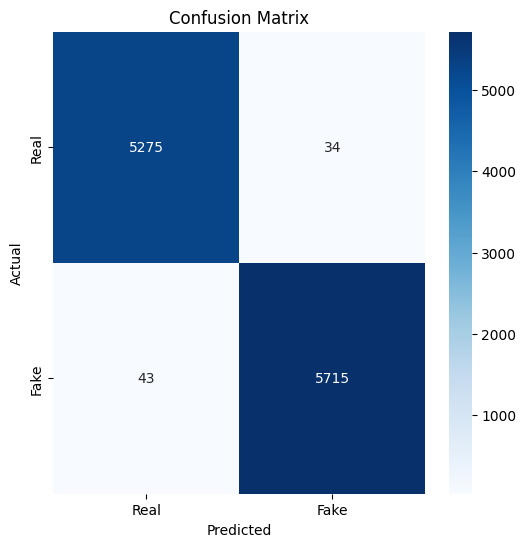

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pickle

# Save the model pipeline to disk
with open('text_clf_model.pkl', 'wb') as f:
    pickle.dump(text_clf, f)

